In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

#read csv file into dataFrame
stats = pd.read_csv("data/afl/stats.csv")
players = pd.read_csv("data/afl/players.csv")
games = pd.read_csv("data/afl/games.csv")

# display a list of players
#player=input ([players["displayName"]])
#player=players["displayName"]=="Franklin, Lance"

#display columns of each table
'''
display (players.columns)
display (games.columns)
display (stats.columns)
'''

# merge on playerId and display & displayName to avoid duplicate columns being created
merge_playerStats = players.merge(stats, how="inner", on=["playerId","displayName"])
#display ("Player Stats ====================================")
#display (merge_playerStats)


# create GamePlayer Stats data frame and merge on gameId and playerId
merge_GamePlayerStats = merge_playerStats.merge(games, how="inner", on=["gameId",'year','round'])
#display ("Game player Stats ====================================")
#display (merge_GamePlayerStats)
display ("==== Data Frames Merged ================================")
#display (player)



'==== Data Frames Merged ================================'

To Do
plot their accumlation of goals over time. The x-axis should be the number of games played and the y-axis should be the number of goals accumulated. Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.

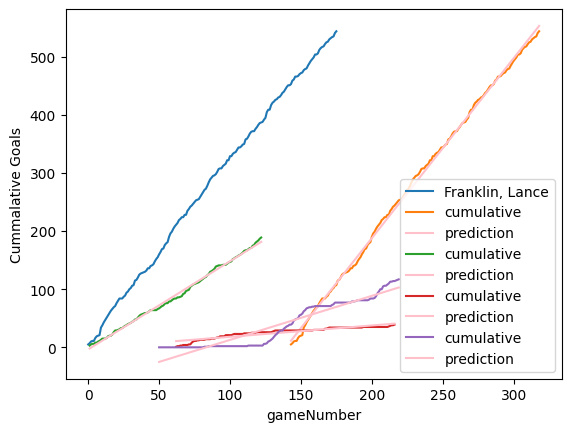

In [2]:


# mask data  based on playerId 
playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]=='Franklin, Lance']
playerName=playerStats.iloc[0,1]
#display(playerName)
#numnberOfGames = playerStats["gameNumber"].count()
#display(numnberOfGames)

playerStats=playerStats.sort_values(by='gameNumber')
playerStats=playerStats.set_index("gameNumber")

#display (playerStats[["gameId","date","year","round","gameNumber","playerId", "displayName","Goals","venue"]])

#x=playerStats["gameNumber"]
#y=playerStats["Goals"].cumsum()
#display (playerStats)
cumulative=playerStats["Goals"].cumsum()
cumulative=cumulative.reset_index(drop=True)
canvas = cumulative.plot(kind="line", x=176,y="playername", ylabel="Cummalative Goals", xlabel="Games Played", legend=True, label=playerName)

#canvas.ylabel="Goals"


'''
plt.plot (y,x)
plt.title ("Accumulation of goals by games played:" + playerName)
plt.xlabel("Game Number")
plt.ylabel("Goals")
plot.show
'''

players=["Franklin, Lance","Papley, Tom","Mumford, Shane","Hooker, Cale"]


for player in players:
    playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==player]
    playerStats=playerStats.sort_values(by='gameNumber')
    gameNumbers=playerStats["gameNumber"]
    cumulativeGoals=playerStats["Goals"].cumsum()


    playerStats['cumulative']=playerStats["Goals"].cumsum()
    
    
    coefficients = np.polyfit(gameNumbers, cumulativeGoals, 1)
    # - Creating the function / formula, that we can use -
    f = np.poly1d(coefficients)  
 
    # - Using our function / formula to generate predictions -
    playerStats["prediction"] = f(playerStats["gameNumber"])

    #display (playerStats["prediction"])
 
    # - Plotting everything -
    canvas = playerStats.set_index('gameNumber')['cumulative'].plot(kind='line', legend=True)

    #canvas = playerStats.plot(kind="line", x="gameNumber", y="cumulative")
    playerStats.plot(kind='line', x='gameNumber', y='prediction', color='pink', ax=canvas) 


    #display data
    '''
    display(player)
    display (playerStats[["gameId","year","round","gameNumber","playerId", "displayName","Goals","venue"]])
    display(y)
    '''
    
    '''
    plt.plot (y,x)
    plt.legend(player)
    plt.title ("Accumulation of goals by games played:")
    plt.xlabel("Game Number")
    plt.ylabel("Goals")
    
    plt.show   
   '''

